## USIU pROJECT

In [13]:
%pip freeze > requirements.txt 

In [1]:
import osmnx as ox
import folium
import matplotlib.pyplot as plt



In [2]:
uni_place = 'USIU Africa, Kenya'
# uni = ox.geocode_to_gdf(uni_place)
# ax = ox.project_gdf(uni).plot()
# draw = ax.axis('off')

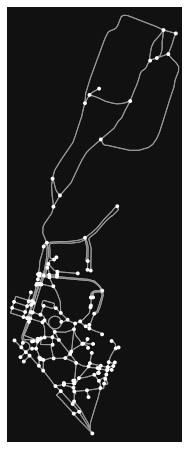

Index(['osmid', 'highway', 'service', 'oneway', 'reversed', 'length',
       'geometry'],
      dtype='object')
Index(['y', 'x', 'street_count', 'highway', 'geometry'], dtype='object')


In [3]:
uni_streets = ox.graph_from_place(uni_place, network_type="walk")
# print(uni_streets.edges(keys=True, data=True))
G = ox.get_undirected(uni_streets)
ox.plot_graph(uni_streets)
edge_attributes = ox.graph_to_gdfs(uni_streets, nodes=False).columns
print(edge_attributes)

node_attributes = ox.graph_to_gdfs(uni_streets, edges=False).columns
print(node_attributes)

In [ ]:
ox.plot_graph_folium(uni_streets,popup_attribute='osmid')

In [ ]:
print(uni_streets)

In [ ]:
fig, ax = ox.plot.plot_graph(uni_streets, edge_color='b', node_color='r')
# plt.show()

In [ ]:
for edge in uni_streets.edges():
    print(edge)

In [23]:
uni_streets[1416513551][5685627328]

AtlasView({0: {'osmid': 128118266, 'highway': 'service', 'service': 'driveway', 'oneway': False, 'reversed': False, 'length': 79.33999999999999, 'geometry': <shapely.geometry.linestring.LineString object at 0x0000027FBDC9F8E0>}})

In [ ]:
print(uni_streets.get_edge_data())

In [ ]:
len(uni_streets.nodes())

In [ ]:
print(uni_streets.nodes(data=True))

In [ ]:
for node in uni_streets.nodes():
    print(node)

In [ ]:
ox.basic_stats(uni_streets)

In [ ]:
fig, ax = ox.plot_graph(G, edge_linewidth=2, node_size=0, node_color='r', show=False, close=False, figsize=(10,25))
for _, edge in ox.graph_to_gdfs(G, nodes=False).fillna('').iterrows():
    text = edge['osmid']
    c = edge['geometry'].centroid
    ax.annotate(text, (c.x, c.y), c='y')
plt.show()

In [ ]:
clist = [str(i) for i in range(1,len(uni_streets.nodes()) + 1)]



In [ ]:
import pandas as pd
# plot map with labels
# spli into nodes and edges
nodes, edges = ox.graph_to_gdfs(G, nodes=True, edges=True)
clist = [str(i) for i in range(1,len(uni_streets.nodes()) + 1)]
lbl = pd.Series(clist, columns = ['label'])
    # n_arr = np.array(clist)
nodes['label'] = lbl
G = ox.graph_from_gdfs(nodes,edges)
fig, ax = ox.plot_graph(G, edge_linewidth=2, node_size=0, show=False, close=False, figsize=(10,25))
for _, node in ox.graph_to_gdfs(G, edges=False).fillna('').iterrows():
    
#     # text = node['osmid']
    txt = node['label']
    c = node['geometry'].centroid
    ax.annotate(txt, (c.x, c.y), c='y')
    # print(node)
plt.show()


In [4]:
# list to label the nodes
listo = [i for i in range(1,len(uni_streets.nodes()) + 1)]
print(listo)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158]


In [5]:
# key buildings, parking etc
key_nodes = [6, 83, 47, 8, 9, 109, 157, 73, 107, 44, 156, 130, 10, 141, 2, 99, 112, 87, 155, 69, 144, 68, 12, 108, 119, 127, 139, 105, 126, 76, 54, 118, 15]
loc_names = [
    'main_gate',
    'admin_parking',
    'transport_office',
    'admin_block',
    'lilian_beam_building',
    'cafeteria',
    'admin_sitting_area',
    'hostels',
    'cafelatta',
    'main_lab',
    'chandaria_biz_sch',
    'library',
    'auditorium',
    'cafelatta_parking_lot',
    'bus_park',
    'basketball_court',
    'auditorium_parking',
    'students_centre',
    'science_complex',
    'new_school_of_humanities',
    'visiting_faculty_building',
    'school_of_comm_and_cinematic_arts',
    'lilian_beam_parking',
    'KCB_lilian_beam',
    'student_centre_parking',
    'swimming_pool',
    'swimming_parking',
    'laundry',
    'science_complex_parking',
    'gate_b',
    'football_pitch',
    'rugby_field',
    'school_of_humanities',
    ]
new_labels = [num if num in key_nodes else '' for num in listo]
print(new_labels)

['', 2, '', '', '', 6, '', 8, 9, 10, '', 12, '', '', 15, '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 44, '', '', 47, '', '', '', '', '', '', 54, '', '', '', '', '', '', '', '', '', '', '', '', '', 68, 69, '', '', '', 73, '', '', 76, '', '', '', '', '', '', 83, '', '', '', 87, '', '', '', '', '', '', '', '', '', '', '', 99, '', '', '', '', '', 105, '', 107, 108, 109, '', '', 112, '', '', '', '', '', 118, 119, '', '', '', '', '', '', 126, 127, '', '', 130, '', '', '', '', '', '', '', '', 139, '', 141, '', '', 144, '', '', '', '', '', '', '', '', '', '', 155, 156, 157, '']


In [6]:
# location and node dictionary
location_dict = dict(zip(key_nodes,loc_names))
print(location_dict)
len(location_dict)

{6: 'main_gate', 83: 'admin_parking', 47: 'transport_office', 8: 'admin_block', 9: 'lilian_beam_building', 109: 'cafeteria', 157: 'admin_sitting_area', 73: 'hostels', 107: 'cafelatta', 44: 'main_lab', 156: 'chandaria_biz_sch', 130: 'library', 10: 'auditorium', 141: 'cafelatta_parking_lot', 2: 'bus_park', 99: 'basketball_court', 112: 'auditorium_parking', 87: 'students_centre', 155: 'science_complex', 69: 'new_school_of_humanities', 144: 'visiting_faculty_building', 68: 'school_of_comm_and_cinematic_arts', 12: 'lilian_beam_parking', 108: 'KCB_lilian_beam', 119: 'student_centre_parking', 127: 'swimming_pool', 139: 'swimming_parking', 105: 'laundry', 126: 'science_complex_parking', 76: 'gate_b', 54: 'football_pitch', 118: 'rugby_field', 15: 'school_of_humanities'}


33

In [7]:
name_labels = [location_dict.get(num) if num in location_dict.keys() else '' for num in new_labels]
print(name_labels)

['', 'bus_park', '', '', '', 'main_gate', '', 'admin_block', 'lilian_beam_building', 'auditorium', '', 'lilian_beam_parking', '', '', 'school_of_humanities', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'main_lab', '', '', 'transport_office', '', '', '', '', '', '', 'football_pitch', '', '', '', '', '', '', '', '', '', '', '', '', '', 'school_of_comm_and_cinematic_arts', 'new_school_of_humanities', '', '', '', 'hostels', '', '', 'gate_b', '', '', '', '', '', '', 'admin_parking', '', '', '', 'students_centre', '', '', '', '', '', '', '', '', '', '', '', 'basketball_court', '', '', '', '', '', 'laundry', '', 'cafelatta', 'KCB_lilian_beam', 'cafeteria', '', '', 'auditorium_parking', '', '', '', '', '', 'rugby_field', 'student_centre_parking', '', '', '', '', '', '', 'science_complex_parking', 'swimming_pool', '', '', 'library', '', '', '', '', '', '', '', '', 'swimming_parking', '', 'cafelatta_parking_lot', '', '', 'visiti

In [8]:
import numpy as np
# convert to Geopandas datframe 
nodes, edges = ox.graph_to_gdfs(G, nodes=True, edges=True)
# add new node info to dataframe
nodes['label'] = listo
nodes['newlbls'] = new_labels
nodes['names'] = name_labels
# print(nodes.head(10))
# nodes['key_points'] = new_labels

# convert to node view - graph
G = ox.graph_from_gdfs(nodes,edges)

# print(G.nodes(data=True))
# # mini_version = ['r' if nodes[nodes['label'].isin(key_nodes)] else 'none' for node in G.nodes()]
# print(mini_version)
# # set_knodes = set(key_nodes)
# # set_nodes = set(listo)
# # r_set = set_nodes - set_knodes
# # print(set_knodes)
# # print(set_nodes)
# # print(r_set)
# # print(mini_version)
# # nodes
# # G = ox.graph_from_gdfs(nodes,edges)
# # G = ox.graph_from_gdfs(mini_version,edges)
# # G3 = G.remove_nodes_from(r_set)
# # print(len(G3.nodes))
# # df = ox.graph_to_gdfs(G, nodes=True, edges=True)
# # print(df)


In [ ]:
# highlight on map key nodes

nodes_data = list(G.nodes(data=True))
color_label = ['r' if node[1]['newlbls'] in key_nodes else 'none' for node in nodes_data]
fig, ax = ox.plot_graph(G, node_color=color_label, node_zorder=2, figsize=(20, 60))


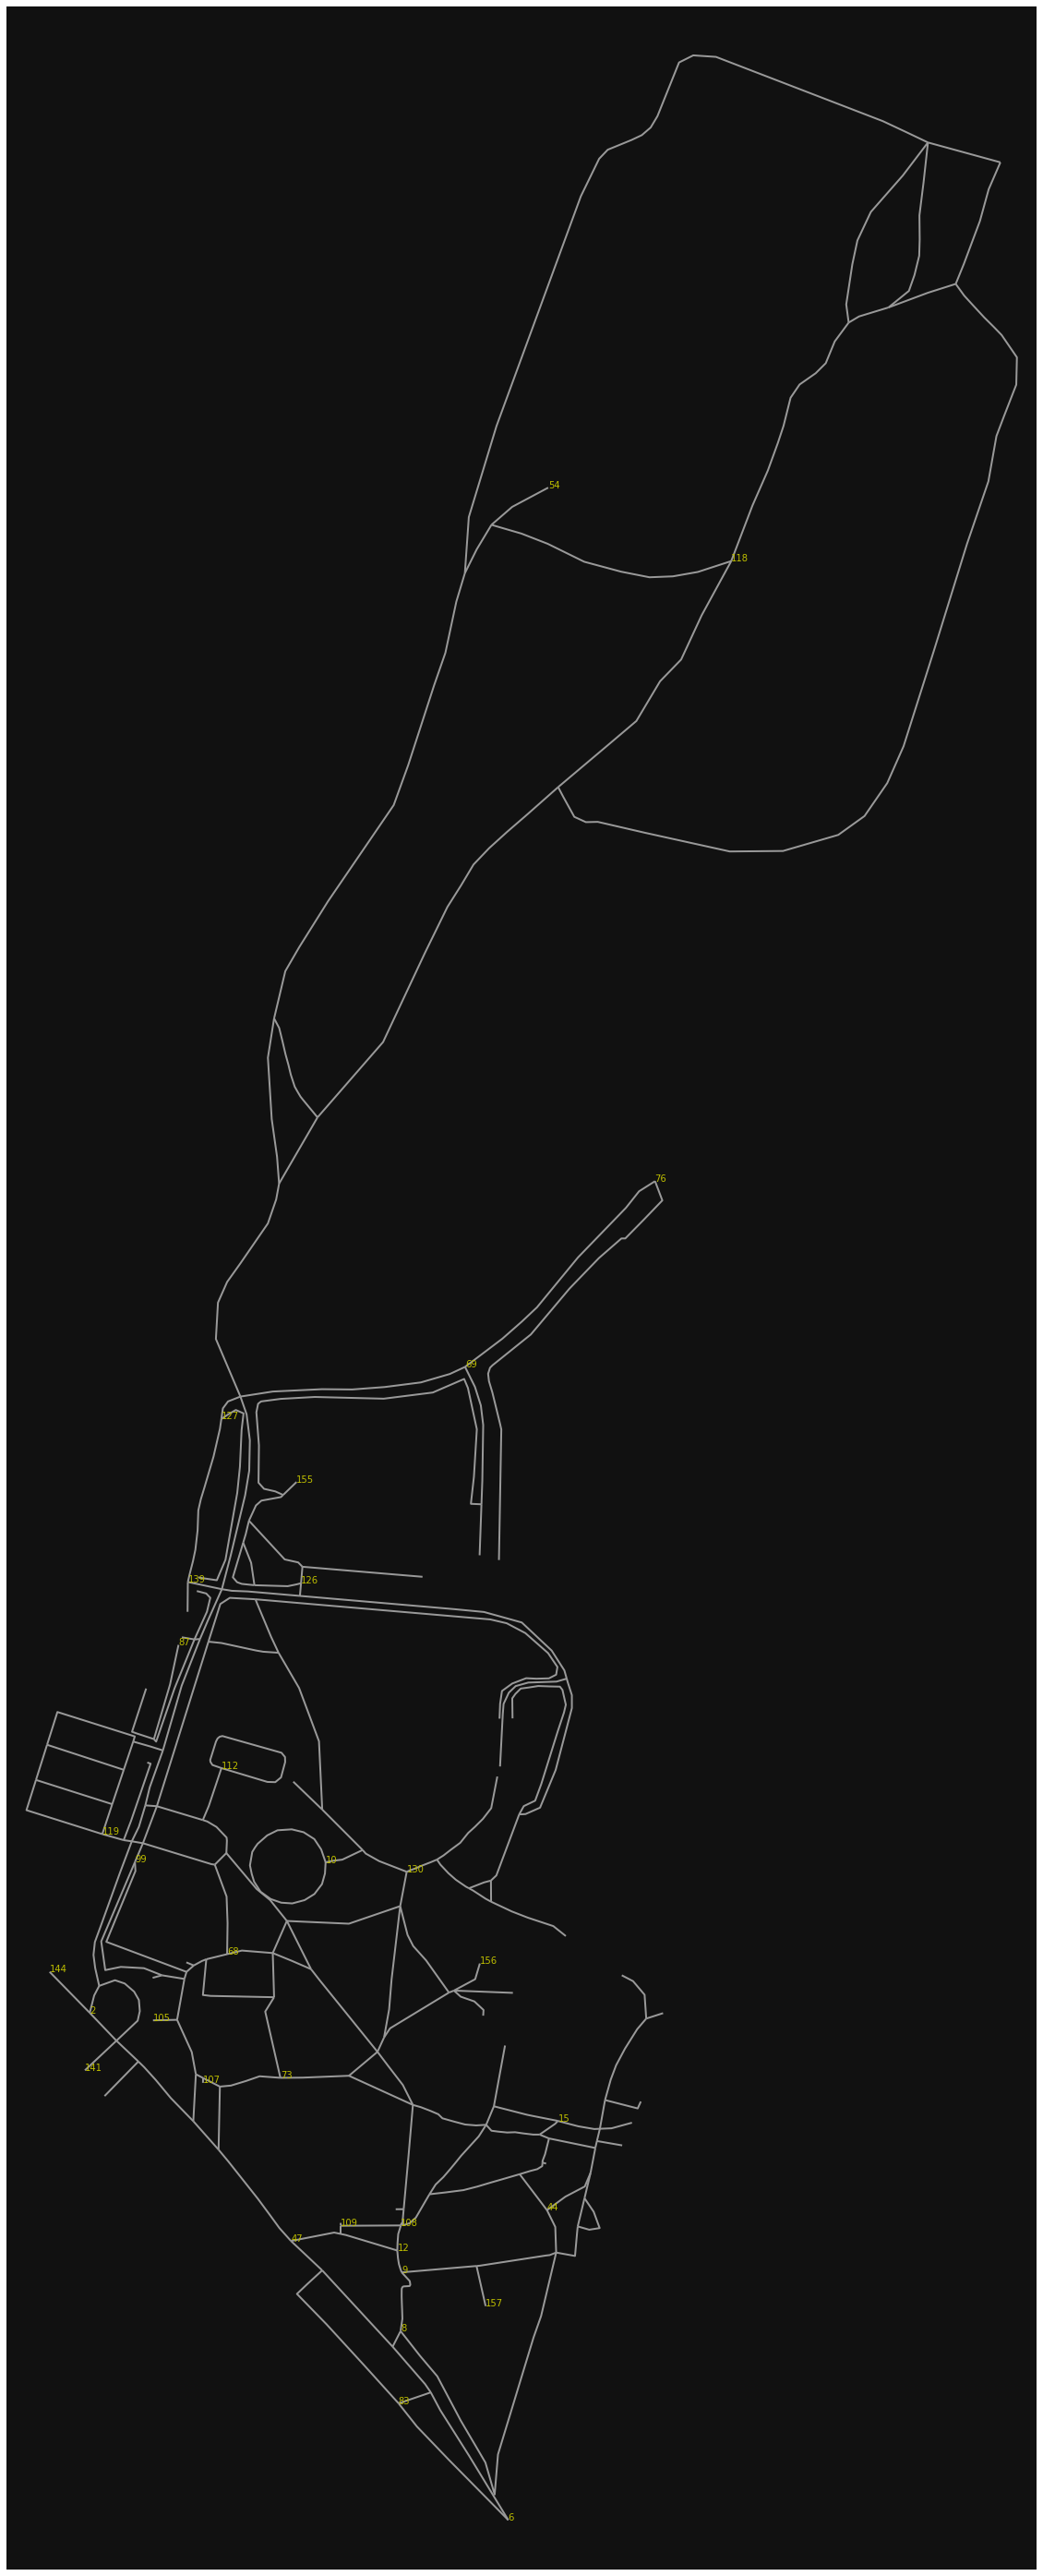

In [9]:
#  draw the map with key nodes
fig, ax = ox.plot_graph(G, edge_linewidth=2, node_size=0, show=False, close=False, figsize=(20, 60))
# # nodez = ox.graph_to_gdfs(G, edges=False)
# # print(nodez['label'])
# # for kp in nodez['key_points']:
for _, node in ox.graph_to_gdfs(G, edges=False).fillna('').iterrows():    
# clist = [str(i) for i in range(1,len(uni_streets.nodes()) + 1)]
# n_arr = np.array(clist)
    # node['label'] = node.index.map(lambda x :  x in n_arr)
# text = node['osmid']
    txt = node['newlbls']
    
    c = node['geometry'].centroid
    
    ax.annotate(txt, (c.x, c.y), c='y')
plt.show()
#     print(node['label'])

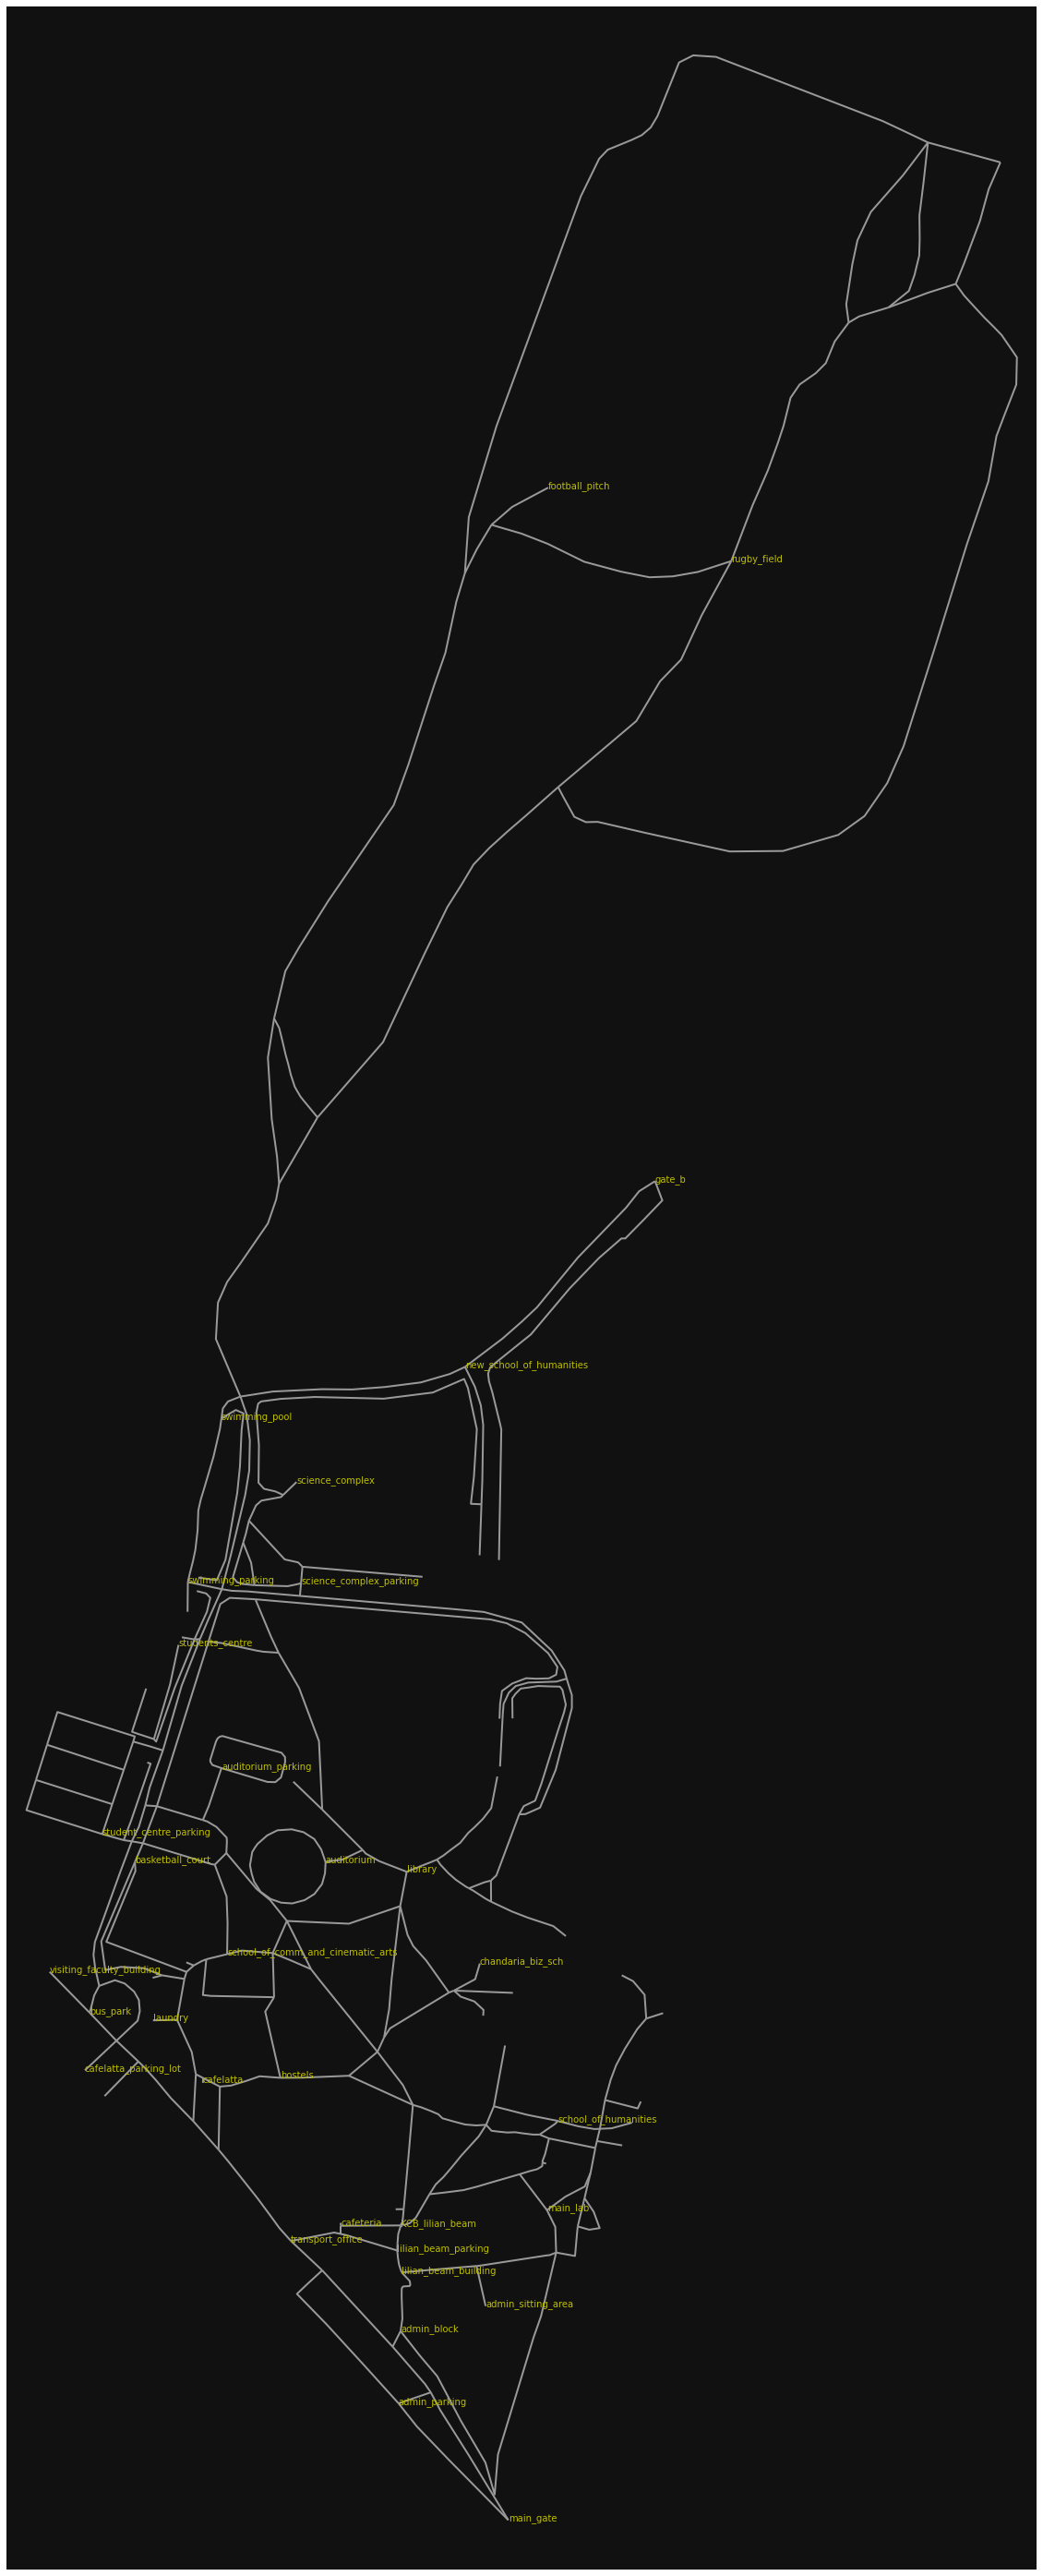

In [10]:
#  draw a map with location names

fig, ax = ox.plot_graph(G, edge_linewidth=2, node_size=0, show=False, close=False, figsize=(20, 60))
# # nodez = ox.graph_to_gdfs(G, edges=False)
# # print(nodez['label'])
# # for kp in nodez['key_points']:
for _, node in ox.graph_to_gdfs(G, edges=False).fillna('').iterrows():    
# clist = [str(i) for i in range(1,len(uni_streets.nodes()) + 1)]
# n_arr = np.array(clist)
    # node['label'] = node.index.map(lambda x :  x in n_arr)
# text = node['osmid']
    txt = node['names']
    
    c = node['geometry'].centroid
    
    ax.annotate(txt, (c.x, c.y), c='y')
plt.show()
#     print(node['label'])

In [ ]:
all_nodes = ox.graph_to_gdfs(G, edges=False)
main_nodes = all_nodes[all_nodes['newlbls'] != '']
print(main_nodes)

In [181]:
import networkx as nx
import random


# origin_input = input("Enter current location")
origin_input = "student_centre_parking"
origin_details = main_nodes.loc[main_nodes['names'] == origin_input]
# print(type(origin_details))
# get node id
origin_node = origin_details.index.to_list()[0]

# destination_input = input("Enter current location")
destination_input = "main_gate"
destination_details = main_nodes.loc[main_nodes['names'] == destination_input]
destination_node = destination_details.index.to_list()[0]

print(origin_node)
print(destination_node)
short_route = ox.distance.shortest_path(G, origin_node, destination_node)
# LT_NODE = main_nodes.query('names == origin_input')
print(short_route)

7409804413
5672326233
None


In [ ]:
x0,y0 = (-1.217451, 36.877484)
x1,y1 = (-1.218487, 36.878397)

origin_node = ox.distance.nearest_nodes(G, x0,y0)
destination_node = ox.distance.nearest_nodes(G, x1,y1)
origin_node, destination_node

In [52]:
node_list = list(G.nodes())

In [ ]:


# get shortest route
node1 = node_list[random.randint(0,33)]
node2 = node_list[random.randint(0,33)]
short_route = nx.shortest_path_length(G, node1, node2, weight='length')
print(f'node1: {node1}')
print(f'node2: {node2}')
short_route

In [11]:
# add general speed limit to dataframe
G1 = ox.add_edge_speeds(G, fallback=5)
n_nodes, n_edges = nodes, edges = ox.graph_to_gdfs(G1, nodes=True, edges=True)
# n_edges
# alculatespeed
G2 = ox.speed.add_edge_travel_times(G1)
# G2_edges = G2.edges(data=True)
n2_nodes, n2_edges = ox.graph_to_gdfs(G2, nodes=True, edges=True)
# n2_edges
# short_route = nx.shortest_path_length(G2, node1, node2, weight='length')
# short_route

In [ ]:
n2_edges


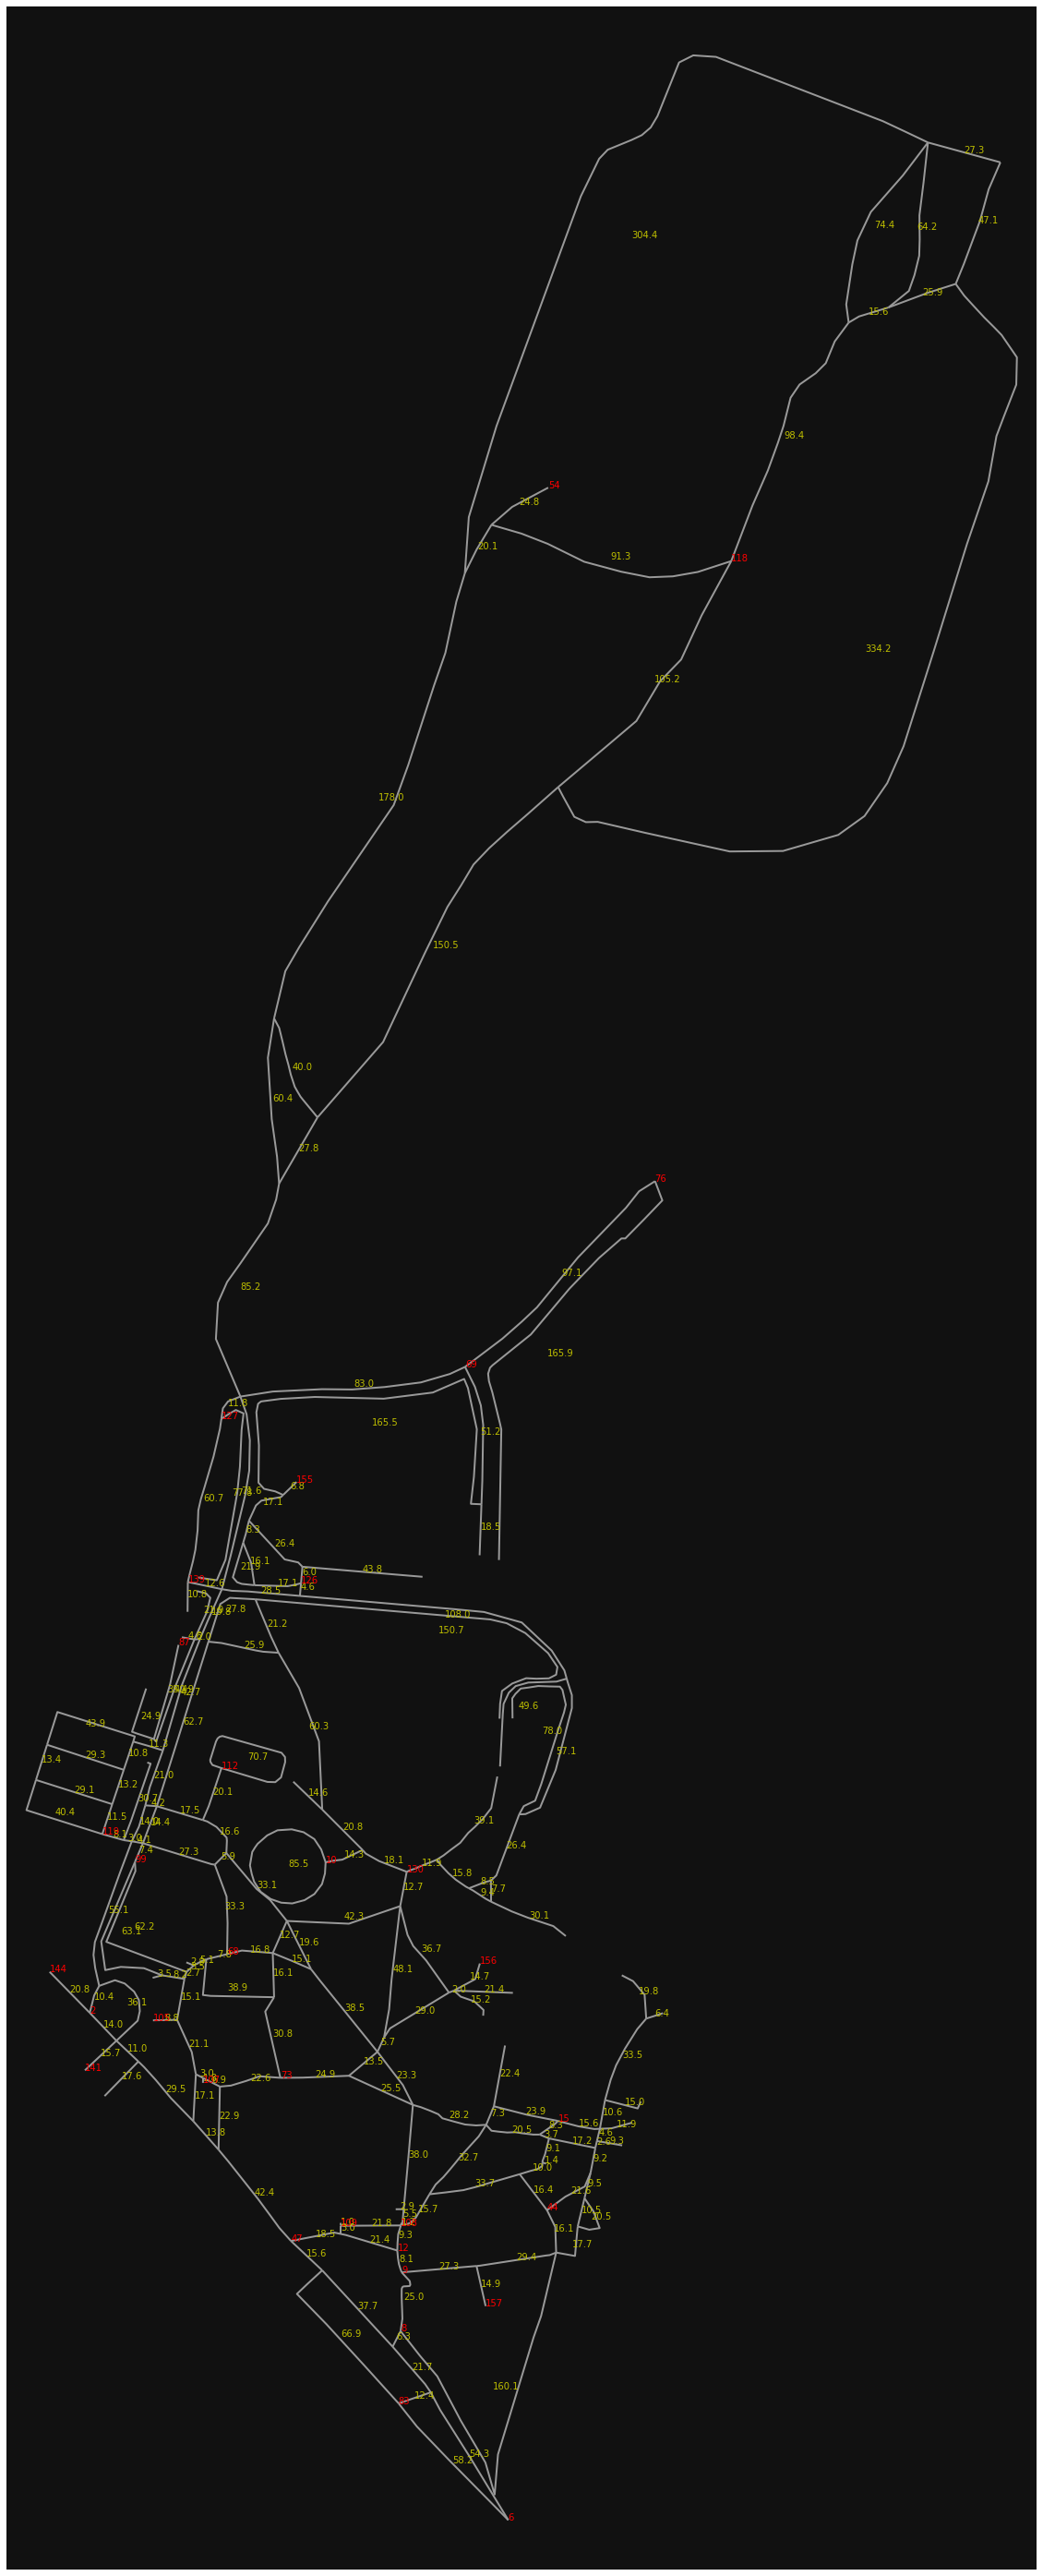

In [12]:
#  draw the map with key nodes
fig, ax = ox.plot_graph(G2, edge_linewidth=2, node_size=0, show=False, close=False, figsize=(20, 60))
# # nodez = ox.graph_to_gdfs(G, edges=False)
# # print(nodez['label'])
# # for kp in nodez['key_points']:
for _, edges in ox.graph_to_gdfs(G2, nodes=False).fillna('').iterrows():    
# clist = [str(i) for i in range(1,len(uni_streets.nodes()) + 1)]
# n_arr = np.array(clist)
    # node['label'] = node.index.map(lambda x :  x in n_arr)
# text = node['osmid']
    txt = edges['travel_time']
    
    c = edges['geometry'].centroid
    
    ax.annotate(txt, (c.x, c.y), c='y')

for _, node in ox.graph_to_gdfs(G2, edges=False).fillna('').iterrows():    
# clist = [str(i) for i in range(1,len(uni_streets.nodes()) + 1)]
# n_arr = np.array(clist)
    # node['label'] = node.index.map(lambda x :  x in n_arr)
# text = node['osmid']
    txt_lbl = node['newlbls']
    
    c = node['geometry'].centroid
    
    ax.annotate(txt_lbl, (c.x, c.y), c='r')
plt.show()

In [ ]:
for _, edges in ox.graph_to_gdfs(G2).fillna('').iterrows():
    print(_)

In [ ]:
p_nodes, p_edges = ox.graph_to_gdfs(G2)#.fillna('').iterrows()
